In [10]:
import matplotlib.pyplot as plt

import numpy as np
import math

In [284]:
data = np.genfromtxt(fname='MagnetTest3.txt', usecols=(0, 2), skip_header=1)
type(data)

numpy.ndarray

In [293]:
dataTop = np.genfromtxt(fname='MagnetTestTop.txt', usecols=(0, 2), skip_header=1)
type(dataTop)

numpy.ndarray

In [332]:
data20 = np.genfromtxt(fname='MagnetTest20.txt', usecols=(0, 2), skip_header=1)
type(dataTop)

numpy.ndarray

In [315]:
dataLong = np.genfromtxt(fname='MagnetTestLong.txt', usecols=(0, 2), skip_header=1)
type(dataLong)

numpy.ndarray

In [316]:
def get_vals(data):
    """This function takes the data set generated from the
    numpy genfromtxt function of the three desired columns
    and returns a list of three lists: the times, CH4 levels,
    and uncertainties.

    Parameters:

    data: numpy.ndarry

        The set of data that you wish to rearrange into a list of its
        columns in each list.

    Returns:

    master_list: list

        A list containing a list for each column in the inputed data set
        with the elements of said column.

    """
    time_list = []
    inc_list = []
    master_list = []
    for i in data:
        unit = np.power(i[1], -6)
        time_list.append(i[0])
        inc_list.append(unit)
    master_list.append(time_list)
    master_list.append(inc_list)
    return master_list

In [317]:
data_list = get_vals(data)
time = data_list[0]
bfield = data_list[1]

In [318]:
data_list_long = get_vals(dataLong)
timeLong = data_list_long[0]
bfieldLong = data_list_long[1]

In [333]:
data_list_20 = get_vals(data20)
time20 = data_list_20[0]
bfield20 = data_list_20[1]

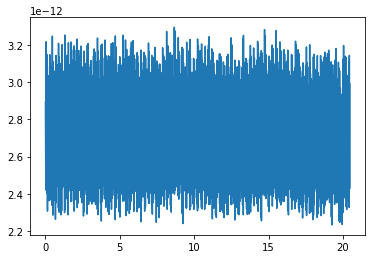

In [319]:
plt.plot(time, bfield)

In [288]:
def getCurrent(bfield):
    current = []
    coeff = (2*math.pi*0.05)/(np.power(4*math.pi, -7))
    for i in bfield:
        elem = coeff*i
        current.append(elem)
    return current

In [289]:
current = getCurrent(bfield)

In [290]:
component = bfield
#component = current

y = np.fft.fft(component)
y_length = len(y)
sample_rate = 100 # Number of Points Per Second
sample_spacing = 1/sample_rate

freq = np.fft.fftfreq(y_length, sample_spacing)

y

array([ 5.62802730e-09+0.00000000e+00j, -3.01183026e-12-7.16616885e-12j,
       -8.04311622e-12-5.88607127e-12j, ...,
       -3.80077202e-12+1.31400836e-11j, -8.04311622e-12+5.88607127e-12j,
       -3.01183026e-12+7.16616885e-12j])

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


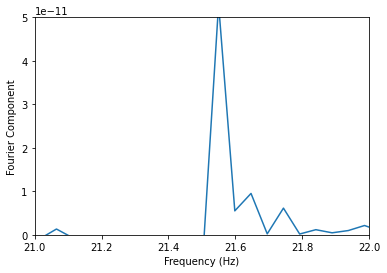

In [329]:
plt.plot(freq, y)
plt.xlim(21, 22)
plt.ylim(0,0.00000000005)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Component')
plt.show()

In [297]:
n = 5
indices = (-y).argsort()[:n]
print(indices)


def getFreq(frequency_list, index_list):
    """ This function takes two lists: one of the set that you
    want to find the values from, and one containing the
    indices at which you want the values from the first list.

    Parameters:

    frequency_list: list

        The list that the desired values are contained in

    index_list: list

        The list containing the indices for the desired values of
        the frequency list.


    Returns:

    freq_return: list

        A list containing the values from frequency_list at the
        indices contained in index_list
    """
    freq_return = []
    for i in index_list:
        freq_return.append(frequency_list[i])
    return freq_return


frequencies = getFreq(freq, indices)
print(frequencies)

[   0  836 1229 1620  445]
[0.0, 40.484261501210646, -40.484261501210646, -21.549636803874087, 21.549636803874087]


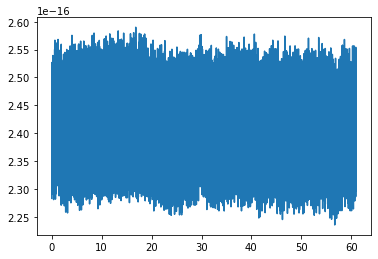

In [305]:
plt.plot(timeLong, bfieldLong)

In [320]:
componentLong = bfieldLong
#componentLong = currentLong

yLong = np.fft.fft(componentLong)
y_length_long = len(yLong)
sample_rate_long = 100 # Number of Points Per Second
sample_spacing_long = 1/sample_rate_long

freqLong = np.fft.fftfreq(y_length_long, sample_spacing_long)

yLong

array([2.11653385e-08-1.73271720e-25j, 2.96713599e-11+1.35435980e-10j,
       6.22421393e-11+1.16305555e-10j, ...,
       6.62396387e-11-2.68908853e-11j, 6.22421393e-11-1.16305555e-10j,
       2.96713599e-11-1.35435980e-10j])

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


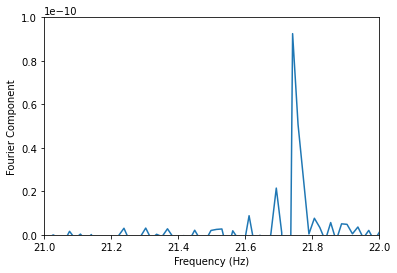

In [330]:
plt.plot(freqLong, yLong)
plt.xlim(21, 22)
plt.ylim(0,0.0000000001)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Component')
plt.show()

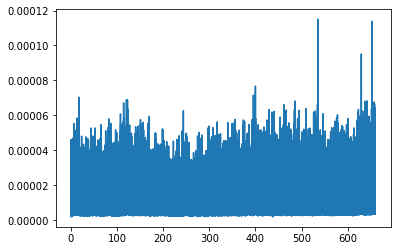

In [334]:
plt.plot(time20, bfield20)

In [335]:
component20 = bfield20
#component20 = current20

y20 = np.fft.fft(component20)
y_length_20 = len(y20)
sample_rate_20 = 100 # Number of Points Per Second
sample_spacing_20 = 1/sample_rate_20

freq20 = np.fft.fftfreq(y_length_20, sample_spacing_20)

y20

array([ 9.10964243e-01+3.46944695e-18j,  2.66012905e-02+3.51498474e-02j,
       -7.22989442e-04-8.71113792e-03j, ...,
        3.65347742e-03-2.05376472e-02j, -7.22989442e-04+8.71113792e-03j,
        2.66012905e-02-3.51498474e-02j])

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


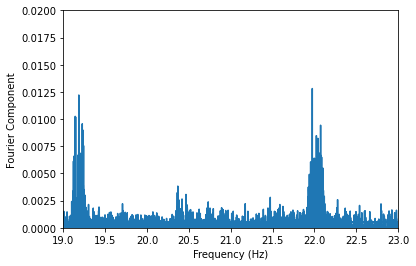

In [345]:
plt.plot(freq20, y20)
plt.xlim(19, 23)
plt.ylim(0,0.02)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Component')
plt.show()